In [ ]:
# pip install plotly

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('white')

pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('mode.chained_assignment', None)

%load_ext autoreload
%autoreload 2

import cv2

import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(True)

In [21]:
gt = pd.read_csv('/mnt/sdb/yokoo/fbisc/input/public_ground_truth.csv')
sub = pd.read_csv('../exp/v23/extract/tmp.csv')

sub = sub.merge(gt, how='left', on='query_id', suffixes=('', '_gt'))

sub['correct'] = sub['reference_id'] == sub['reference_id_gt']

In [31]:
def load_images(row):
    qimg = cv2.imread(f"../input/query_images/{row['query_id']}.jpg")[:, :, ::-1]
    rimg = cv2.imread(f"../input/reference_images/{row['reference_id']}.jpg")[:, :, ::-1]
    return qimg, rimg

In [33]:
qimg, rimg = load_images(sub.iloc[217180])

In [75]:
sub[sub.reference_id_gt.notna() & (sub.correct)].iloc[:100]

query_id reference_id    score reference_id_gt  correct
40     Q00004      R852827 -0.88130         R852827     True
460    Q00046      R277154 -0.78807         R277154     True
580    Q00058      R757586 -1.65183         R757586     True
632    Q00063      R645082 -1.84356         R645082     True
650    Q00065      R267733 -0.83771         R267733     True
730    Q00073      R379825 -0.93292         R379825     True
830    Q00083      R964915 -1.84716         R964915     True
960    Q00096      R402336 -0.65897         R402336     True
1090   Q00109      R063541 -1.78504         R063541     True
1170   Q00117      R414344 -1.40651         R414344     True
1280   Q00128      R699182 -1.13554         R699182     True
1500   Q00150      R231163 -0.84917         R231163     True
1550   Q00155      R779963 -1.67999         R779963     True
1610   Q00161      R630056 -0.86891         R630056     True
1630   Q00163      R180219 -1.73327         R180219     True
1710   Q00171      R873872 -0.56818         R873872     True
1870   Q00187      R712300 -0.83531         R712300     True
1980   Q00198      R548358 -0.80980         R548358     True
2060   Q00206      R595071 -1.58360         R595071     True
2100   Q00210      R605071 -1.77048         R605071     True
2140   Q00214      R697938 -0.94590         R697938     True
2170   Q00217      R505137 -1.45026         R505137     True
2210   Q00221      R698063 -1.38034         R698063     True
2370   Q00237      R815689 -0.84572         R815689     True
2550   Q00255      R391242 -0.61527         R391242     True
2590   Q00259      R831896 -1.44594         R831896     True
2640   Q00264      R526733 -1.20601         R526733     True
2740   Q00274      R405525 -1.65430         R405525     True
2830   Q00283      R770363 -1.16091         R770363     True
2910   Q00291      R276389 -1.73171         R276389     True
2940   Q00294      R462833 -1.05207         R462833     True
3100   Q00310      R539117 -1.22820         R539117     True
3130   Q00313      R075108 -0.57616         R075108     True
3160   Q00316      R321619 -0.93875         R321619     True
3230   Q00323      R126016 -1.43485         R126016     True
3240   Q00324      R044970 -1.54697         R044970     True
3380   Q00338      R003142 -1.00618         R003142     True
3470   Q00347      R183647 -0.73506         R183647     True
3530   Q00353      R707829 -0.56186         R707829     True
3630   Q00363      R247147 -1.27228         R247147     True
3640   Q00364      R722330 -1.58656         R722330     True
3690   Q00369      R419725 -1.03567         R419725     True
3890   Q00389      R552823 -1.57287         R552823     True
3920   Q00392      R451016 -0.79735         R451016     True
3930   Q00393      R080786 -1.73028         R080786     True
3960   Q00396      R868533 -1.81638         R868533     True
4030   Q00403      R617127 -1.22794         R617127     True
4190   Q00419      R870815 -0.66788         R870815     True
4230   Q00423      R983617 -0.81455         R983617     True
4340   Q00434      R678038 -1.48630         R678038     True
4390   Q00439      R890569 -1.25547         R890569     True
4500   Q00450      R152537 -1.52489         R152537     True
4600   Q00460      R386493 -1.27004         R386493     True
4700   Q00470      R583310 -1.04582         R583310     True
4710   Q00471      R747517 -1.59794         R747517     True
4720   Q00472      R431059 -0.72677         R431059     True
4770   Q00477      R473872 -1.27149         R473872     True
4800   Q00480      R848625 -1.49536         R848625     True
4960   Q00496      R261103 -1.52978         R261103     True
4970   Q00497      R567348 -1.03142         R567348     True
5110   Q00511      R301469 -0.79944         R301469     True
5144   Q00514      R394110 -1.89674         R394110     True
5210   Q00521      R574471 -1.81339         R574471     True
5230   Q00523      R822056 -0.73443         R822056     True
5250   Q00525      R473755 -1.14063     

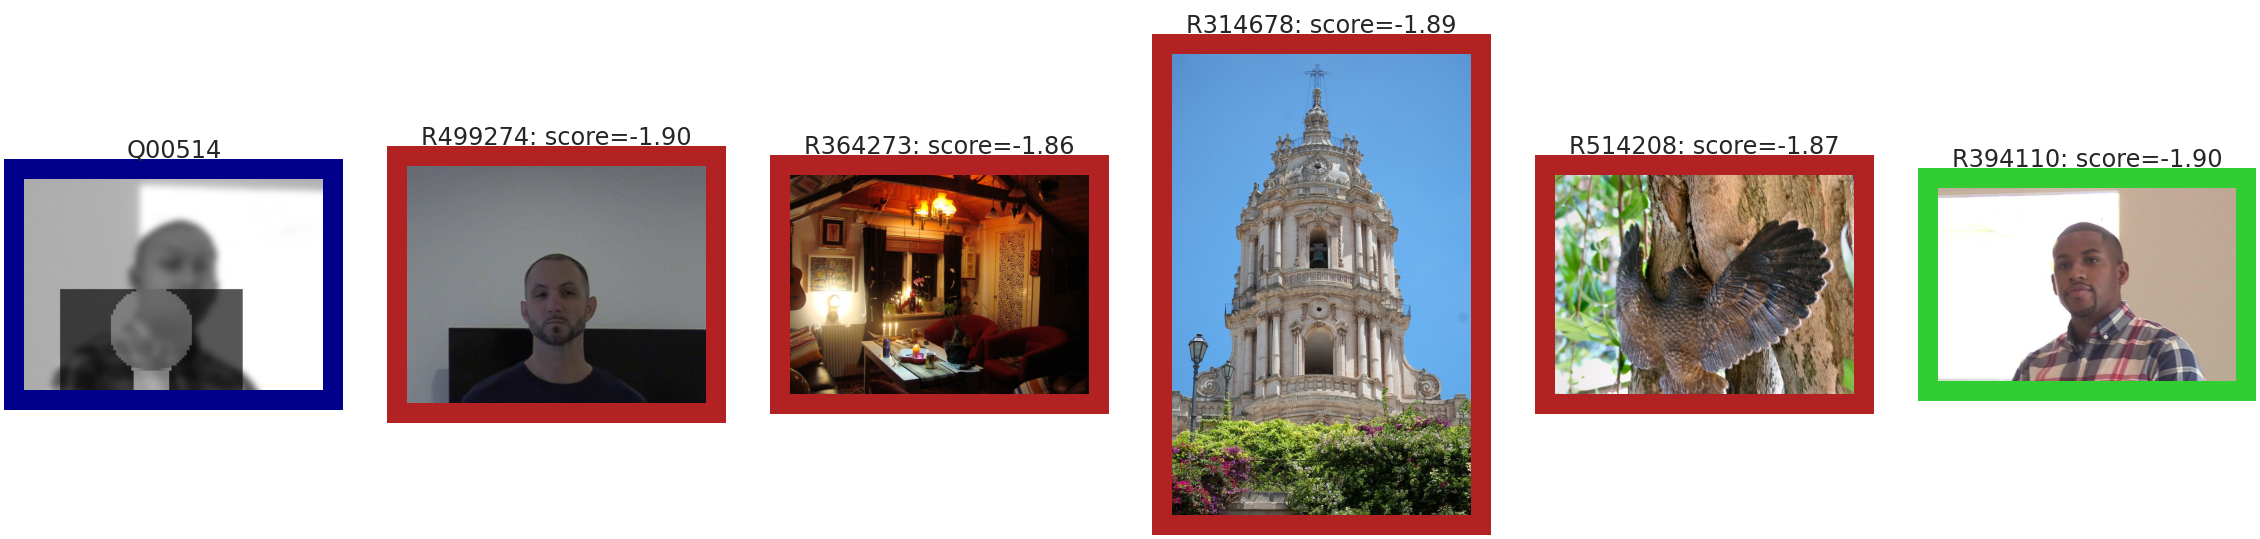

In [80]:
qid = 'Q00514'

k = 5
nrows = 1
ncols = k + 1

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 7))

df = sub[sub['query_id'] == qid]
qimg = cv2.imread(f"../input/query_images/{qid}.jpg")[:, :, ::-1]

ax[0].imshow(qimg)
ax[0].set_title(qid)
for loc in ["top", "left", "bottom", "right"]:
    ax[0].spines[loc].set_linewidth(10)
    ax[0].spines[loc].set_color('darkblue')
ax[0].axes.xaxis.set_ticks([])
ax[0].axes.yaxis.set_ticks([])

for i, (_, row) in enumerate(df.iterrows()):
    if i == k:
        break
    rimg = cv2.imread(f"../input/reference_images/{row['reference_id']}.jpg")[:, :, ::-1]
    ax[i+1].imshow(rimg)
    ax[i+1].set_title(f"{row['reference_id']}: score={row['score']:.2f}")
    color = 'limegreen' if row['reference_id'] == row['reference_id_gt'] else 'firebrick'
    for loc in ["top", "left", "bottom", "right"]:
        ax[i+1].spines[loc].set_linewidth(10)
        ax[i+1].spines[loc].set_color(color)
    ax[i+1].axes.xaxis.set_ticks([])
    ax[i+1].axes.yaxis.set_ticks([])

In [4]:
gt = pd.read_csv('/mnt/sdb/yokoo/fbisc/input/public_ground_truth.csv')

In [5]:
tmp = gt[gt['reference_id'].notna()]


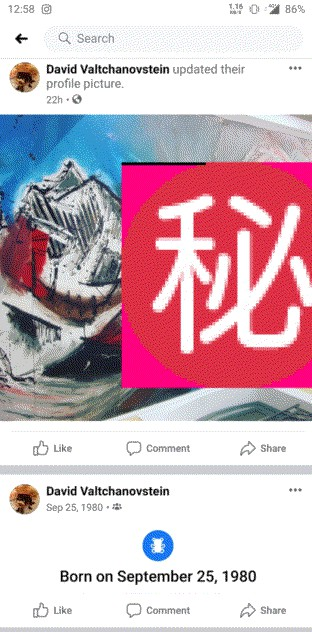

In [17]:
i = 2013
qid, rid = tmp.iloc[i]

qimg = cv2.imread(f'/mnt/sdb/yokoo/fbisc/input/query_images/{qid}.jpg')[:,:,::-1]
px.imshow(qimg)


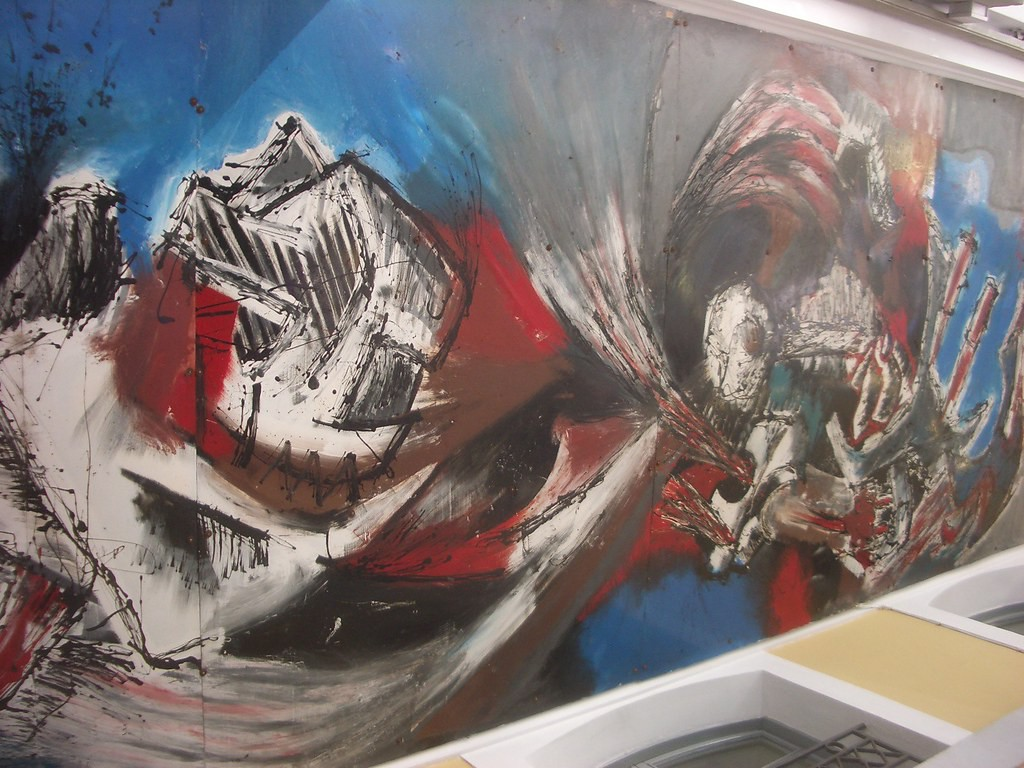

In [18]:
# if isinstance(rid, str):
rimg = cv2.imread(f'/mnt/sdb/yokoo/fbisc/input/reference_images/{rid}.jpg')[:,:,::-1]
px.imshow(rimg)

In [19]:
import augly.image as imaugs

In [143]:
from augly.image import (
    EncodingQuality,
    OverlayOntoScreenshot,
    RandomBlur,
    RandomBrightness,
    RandomPixelization,
    Saturation,
    ShufflePixels,
    OneOf,
)

from augly.image.functional import overlay_emoji, overlay_text
from augly.image.transforms import BaseTransform
from augly.utils.constants import FONT_PATH, SMILEY_EMOJI_DIR
from augly.utils import pathmgr
from typing import Any, Dict, List, Optional
import random
import os

class RandomOverlayText(BaseTransform):
    def __init__(
        self,
        font_file: str = FONT_PATH,
        opacity: float = 1.0,
        p: float = 1.0,
    ):
        super().__init__(p)
        self.font_file = font_file
        self.opacity = opacity

    def apply_transform(
        self, image: Image.Image, metadata: Optional[List[Dict[str, Any]]] = None
    ) -> Image.Image:
        return overlay_text(
            image,
            text=[random.randrange(1, 100000) for _ in range(5)],
            font_file=self.font_file,
            font_size=random.uniform(0.1, 0.3),
            opacity=self.opacity,
            color=[random.randrange(0, 256) for _ in range(3)],
            x_pos=random.uniform(0.0, 0.5),
            y_pos=random.uniform(0.0, 0.5),
            metadata=metadata,
        )

class RandomEmojiOverlay(BaseTransform):
    def __init__(
        self,
        emoji_directory: str = SMILEY_EMOJI_DIR,
        opacity: float = 1.0,
        p: float = 1.0,
    ):
        super().__init__(p)
        self.emoji_directory = emoji_directory
        self.emoji_paths = pathmgr.ls(emoji_directory)
        self.opacity = opacity

    def apply_transform(
        self, image: Image.Image, metadata: Optional[List[Dict[str, Any]]] = None
    ) -> Image.Image:
        emoji_path = random.choice(self.emoji_paths)
        return overlay_emoji(
            image,
            emoji_path=os.path.join(self.emoji_directory, emoji_path),
            opacity=self.opacity,
            emoji_size=random.uniform(0.1, 0.3),
            x_pos=random.uniform(0.0, 1.0),
            y_pos=random.uniform(0.0, 1.0),
            metadata=metadata,
        )

In [25]:
import torchvision.transforms as transforms
from PIL import Image

In [69]:
img = Image.open(f'/mnt/sdb/yokoo/fbisc/input/reference_images/{rid}.jpg')

In [170]:
from types import SimpleNamespace
args = SimpleNamespace()
args.input_size= 320

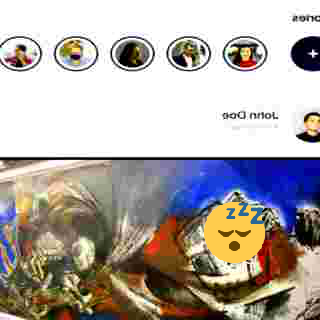

In [208]:
overlay1 = OverlayOntoScreenshot()
overlay2 = OverlayOntoScreenshot(template_filepath=overlay1.template_filepath.replace('web', 'mobile'))

transforms.Compose([
    OneOf([overlay1, overlay2], p=1.0),
    transforms.RandomResizedCrop(args.input_size, scale=(0.2, 1.)),
    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
    Saturation(factor=2.0, p=0.2),
    RandomBrightness(min_factor=0.5, max_factor=1.5, p=0.2),
    RandomPixelization(p=0.2),
    ShufflePixels(factor=0.1, p=0.2),
    OneOf([EncodingQuality(quality=q) for q in [10, 20, 30, 50]], p=0.5),
    transforms.RandomGrayscale(p=0.2),
    RandomBlur(p=0.2),
    transforms.RandomPerspective(p=0.2),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    RandomOverlayText(p=0.2),
    RandomEmojiOverlay(p=0.2),
    transforms.ToTensor(),
    transforms.RandomErasing(value='random', p=0.2),
    transforms.ToPILImage(),
])(img)

In [186]:
%debug

> /home/shuhei.yokoo/anaconda3/envs/fbisc/lib/python3.7/site-packages/torchvision/transforms/functional.py(335)normalize()
    333     if std.ndim == 1:
    334         std = std.view(-1, 1, 1)
--> 335     tensor.sub_(mean).div_(std)
    336     return tensor
    337 

ipdb> u
> /home/shuhei.yokoo/anaconda3/envs/fbisc/lib/python3.7/site-packages/torchvision/transforms/transforms.py(221)forward()
    219             Tensor: Normalized Tensor image.
    220         """
--> 221         return F.normalize(tensor, self.mean, self.std, self.inplace)
    222 
    223     def __repr__(self):

ipdb> u
> /home/shuhei.yokoo/anaconda3/envs/fbisc/lib/python3.7/site-packages/torch/nn/modules/module.py(1051)_call_impl()
   1049         if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks or _global_backward_hooks
   1050                 or _global_forward_hooks or _global_forward_pre_hooks):
-> 1051             return forward_call(*input, **kwargs)
   1052         # Do not c

torchvision.transforms.transforms.ColorJitter